# MNIST

## Import Libraries

In [58]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

## Prepare the dataset

### Load the dataset

In [59]:
train_dataset = datasets.MNIST('./data', train=True, download=True,
                               transform=transforms.Compose([
                                   transforms.Resize((32, 32)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                                   ]))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST('./data', train=False,
                             transform=transforms.Compose([
                                 transforms.Resize((32, 32)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                                 ]))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

## Model(LeNet-5)

In [60]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 6, 5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(6, 16, 5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(16, 120, 5, stride=1),
            nn.Tanh(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 120)
        x = self.fc_layers(x)
        return x

## Functions to compute the models

### Train

In [61]:
def train(model, train_loader, optimizer, loss_function, epoch):
    model.train()
    train_loss = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * data.size(0)
        total += data.size(0)

        if batch_idx % 1000 == 0:
            print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch, loss.item()))

    avg_loss = train_loss / total
    train_losses.append(avg_loss)


### Test

In [62]:
def test(model, test_loader, loss_function):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = loss_function(output, target)
            test_loss += loss.item() * data.size(0)  # 총 손실
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += data.size(0)

    avg_test_loss = test_loss / total
    test_losses.append(avg_test_loss)

    print('Test set: Average loss: {:.6f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        avg_test_loss, correct, total,
        100. * correct / total))


### Visualization

In [ ]:
def plot_loss(train_losses, test_losses, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(train_losses) + 1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Train vs Test Loss')
    plt.legend()
    plt.show()

## Main

In [63]:
batch_size = 64
epochs = 10

models = ['LeNet5', 'LeNet5_ReLU']

for model in models:
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_function = nn.CrossEntropyLoss()

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        train(model, train_loader, optimizer, loss_function, epoch)
        test(model, test_loader, loss_function)

Train Epoch: 0	Loss: 2.300829
Test set: Average loss: 0.155799, Accuracy: 9517/10000 (95.17%)

Train Epoch: 1	Loss: 0.080284
Test set: Average loss: 0.156108, Accuracy: 9551/10000 (95.51%)

Train Epoch: 2	Loss: 0.189113
Test set: Average loss: 0.130307, Accuracy: 9612/10000 (96.12%)

Train Epoch: 3	Loss: 0.072650
Test set: Average loss: 0.115760, Accuracy: 9638/10000 (96.38%)

Train Epoch: 4	Loss: 0.103538
Test set: Average loss: 0.123739, Accuracy: 9634/10000 (96.34%)

Train Epoch: 5	Loss: 0.123110
Test set: Average loss: 0.131302, Accuracy: 9597/10000 (95.97%)

Train Epoch: 6	Loss: 0.170559
Test set: Average loss: 0.125390, Accuracy: 9638/10000 (96.38%)

Train Epoch: 7	Loss: 0.078603
Test set: Average loss: 0.128920, Accuracy: 9603/10000 (96.03%)

Train Epoch: 8	Loss: 0.036443
Test set: Average loss: 0.141312, Accuracy: 9602/10000 (96.02%)

Train Epoch: 9	Loss: 0.090570
Test set: Average loss: 0.118355, Accuracy: 9659/10000 (96.59%)



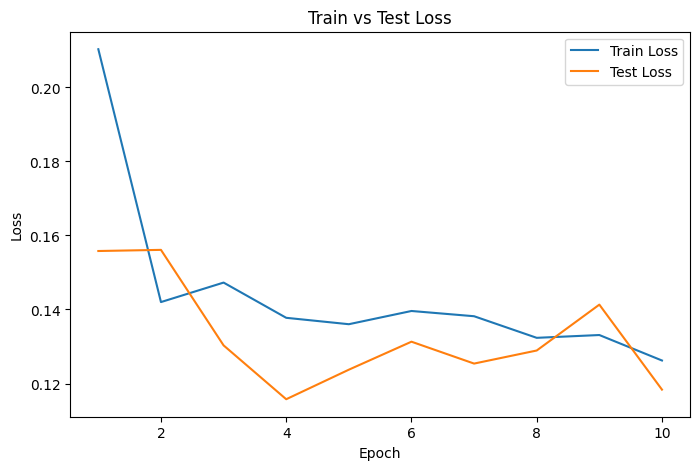

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(train_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()